In [1]:
# %matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
#from impedance.preprocessing import readGamry



# Z_exp = open("Exp-data.DTA")
# print(Z_exp.read())

# f,Z_exp2= readGamry("1PVDF_K_0_0131_top16mm_A.DTA")
# print(Z_exp2)
# print(f)


filename = "1PVDF_K_0_0131_top16mm_A.DTA"

with open(filename, 'r', encoding='ISO-8859-1') as input_file:
        lines = input_file.readlines()
        
for count,line in enumerate(lines):
    if "ZCURVE" in line:
         start_line = count+3
raw_data = lines[start_line:]

freq_exp, ReZ_exp, ImZ_exp =[], [], []

for line in raw_data:
        # line = line.replace(",", ".")
        each_line = line.split()
        freq_exp.append(float(each_line[2]))
        ReZ_exp.append(float(each_line[3]))
        ImZ_exp.append(float(each_line[4]))

freq_exp =np.array(freq_exp)  
ReZ_exp =np.array(ReZ_exp) 
ImZ_exp =np.array(ImZ_exp)    
#print(freq_exp)  
#print(ReZ_exp) 

In [2]:
# RQ initialization

R_f = 10
Q_f = 3e-5
alp = 0.8

# freq =np.logspace(5,1,10);
# omega = 2*np.pi*freq
# Impedance_rq = R_f + 1/(((1j*omega)**alp)*Q_f)
# print(Impedance_rq)

c:\Users\Admin\anaconda3\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Chi_square is 0.0189
9.2985 3.2e-05 0.8652


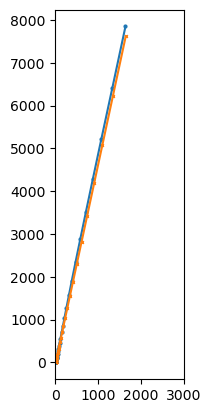

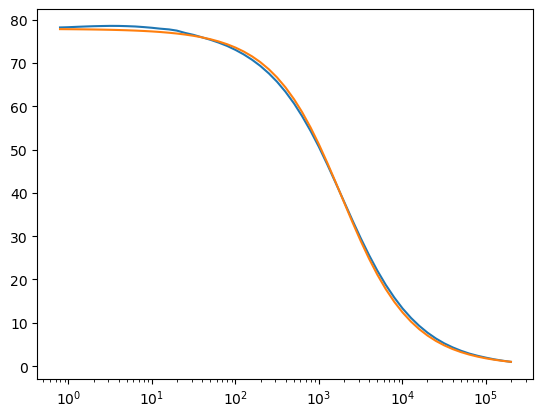

In [3]:
from scipy.optimize import minimize, NonlinearConstraint

def objective(x):
    
    
    omega = 2*np.pi*freq_exp
    R_f = x[0]
    Q_f = x[1]
    alp = x[2]

    Impedance_rq = R_f + 1/(((1j*omega)**alp)*Q_f)
    # print(Impedance_rq)
    mod_weight = (np.real(Impedance_rq)**2 + np.imag(Impedance_rq)**2)
   
    unit_weight =1
    weight = mod_weight
    terms = ((np.real(Impedance_rq) - ReZ_exp)**2 +(np.imag(Impedance_rq) - ImZ_exp)**2)/weight
    Chi_square = sum(terms)
    return Chi_square

# def constraint(x):
#     return x[0]**2 + x[1]**2 - 1

# initial guess
x0 = [1, 1, 1]

# define the bounds for the variables
bounds = ((0, 1000), (0, 1000),(0, 1))

# define the nonlinear constraint
# nonlinear_constraint = NonlinearConstraint(constraint, -np.inf, 0)

# minimize the objective function subject to the nonlinear constraint
res = minimize(objective,x0,method='trust-constr', constraints=[], bounds=bounds)
# res = curve_fit(objective,x0, method='trust-constr', constraints=[], bounds=bounds)

#print(f"{res.fun:.4f}")

Chi_square_min = res.fun
print(f"Chi_square is {Chi_square_min:.4f}")
R_fit = round(res.x[0],4)
Q_fit = round(res.x[1],6)
alp_fit = round(res.x[2],4)
omega = 2*np.pi*freq_exp
Impedance_rq_fit= R_fit + 1/(((1j*omega)**alp_fit)*Q_fit)
print(R_fit,Q_fit,alp_fit)
# mod_weight = np.real(Impedance_rq_fit)**2 + np.imag(Impedance_rq_fit)**2
# plt.semilogx(freq_exp,mod_weight)
# plt.show()

#print(f"The minimum value of the objective function is {res.fun:.4f} at x = {res.x}.")


####Plots
plt.plot(ReZ_exp,-ImZ_exp,'o-',ms=2)
plt.plot(np.real(Impedance_rq_fit),-np.imag(Impedance_rq_fit),'x-',ms=2)
plt.xlim(0,3000)
# plt.legend("Exp","fit")
plt.gca().set_aspect('equal')
plt.show()

#Phase angle plot
plt.semilogx(freq_exp,57.29*np.arctan(-ImZ_exp/ReZ_exp))
plt.semilogx(freq_exp,57.29*np.arctan(-np.imag(Impedance_rq_fit)/np.real(Impedance_rq_fit)))
plt.show()


In [4]:
print(np.arctan(1))

0.7853981633974483


In [5]:
# from mpl_interactions import ioff, panhandler, zoom_factory
# import matplotlib.pyplot as plt
# %matplotlib widget

# # Create a dataset or load your own dataset for plotting the graph
# data = {'x': [1, 2, 3, 4, 5], 'y': [2, 4, 6, 8, 10]}

# # Interactions library function like ioff and zoom_factory.
# with plt.ioff():
#     fig, ax = plt.subplots()
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     plt.title('Plot with zoom enabled')
#     plt.plot(data['x'], data['y'], color='blue')
#     disconnect_zoom = zoom_factory(ax)

#     # Interactions library function like panhandler.
#     pan_handler = panhandler(fig)
#     display(fig.canvas)


In [6]:
# import sys
# print(sys.executable)

In [12]:
# Mathematical solution fitting

# To get solutions of characteristic equations
import scipy
from sympy import *

lam = Symbol("lambda")
sol =0  
NN = 10   # No of solutions of the equation
solutions = [0]  # First solution

for i in range(1,NN):
    sol = nsolve(besselj(1,lam),sol+3,prec= 5)
    solutions.append(sol)

solutions = np.array(solutions)
print(solutions)

[0 3.8317 7.0156 10.173 13.324 16.471 19.616 22.760 25.904 29.047]


In [ ]:
from scipy.optimize import minimize, NonlinearConstraint

def objective(x):
    
    t= dist = 120*1e-6
    K_pure =0.131
    rb=16e-3/2
    rtop=16e-3/2
    
    omega = 2*np.pi*freq_exp
    Nm_f = x[0]
    C_f = x[1]
    alp = x[2]
    
    xi=rtop/rb
    yt = t/rb

    #Frequency independent terms
    L_A


    Impedance_rq = R_f + 1/(((1j*omega)**alp)*Q_f)
    # print(Impedance_rq)
    mod_weight = (np.real(Impedance_rq)**2 + np.imag(Impedance_rq)**2)
   
    unit_weight =1
    weight = mod_weight
    terms = ((np.real(Impedance_rq) - ReZ_exp)**2 +(np.imag(Impedance_rq) - ImZ_exp)**2)/weight
    Chi_square = sum(terms)
    return Chi_square

# def constraint(x):
#     return x[0]**2 + x[1]**2 - 1

# initial guess
x0 = [1, 1, 1]

# define the bounds for the variables
bounds = ((0, 1000), (0, 1000),(0, 1))

# define the nonlinear constraint
# nonlinear_constraint = NonlinearConstraint(constraint, -np.inf, 0)

# minimize the objective function subject to the nonlinear constraint
res = minimize(objective,x0,method='trust-constr', constraints=[], bounds=bounds)
# res = curve_fit(objective,x0, method='trust-constr', constraints=[], bounds=bounds)

#print(f"{res.fun:.4f}")

Chi_square_min = res.fun
print(f"Chi_square is {Chi_square_min:.4f}")
R_fit = round(res.x[0],4)
Q_fit = round(res.x[1],6)
alp_fit = round(res.x[2],4)
omega = 2*np.pi*freq_exp
Impedance_rq_fit= R_fit + 1/(((1j*omega)**alp_fit)*Q_fit)
print(R_fit,Q_fit,alp_fit)
# mod_weight = np.real(Impedance_rq_fit)**2 + np.imag(Impedance_rq_fit)**2
# plt.semilogx(freq_exp,mod_weight)
# plt.show()

#print(f"The minimum value of the objective function is {res.fun:.4f} at x = {res.x}.")


####Plots
plt.plot(ReZ_exp,-ImZ_exp,'o-',ms=2)
plt.plot(np.real(Impedance_rq_fit),-np.imag(Impedance_rq_fit),'x-',ms=2)
plt.xlim(0,3000)
# plt.legend("Exp","fit")
plt.gca().set_aspect('equal')
plt.show()

#Phase angle plot
plt.semilogx(freq_exp,57.29*np.arctan(-ImZ_exp/ReZ_exp))
plt.semilogx(freq_exp,57.29*np.arctan(-np.imag(Impedance_rq_fit)/np.real(Impedance_rq_fit)))
plt.show()
